# Dampe calorimeter regression task

In this project you will be looking at image like data from particle hits in a calorimeter. The goal of the project is to predict the location of the particle in the sky, using the data recorded by the calorimeter.

In [1]:
from utils import get_input_data
calorimeter_images, calorimeter_data, data_target = get_input_data()

In [2]:
import matplotlib.pyplot as mp
from matplotlib.colors import LogNorm
import numpy as np

In [3]:
n_samples, height, width, channels = calorimeter_images.shape
print(f'There are {n_samples} images, each image is {height} pixels by {width} pixels with {channels} channels.')
print(f'The data is of type {calorimeter_images.dtype}')
print(f'The max data entry is {calorimeter_images.max()} the minimum data entry is {calorimeter_images.min()}.')


There are 141946 images, each image is 14 pixels by 22 pixels with 1 channels.
The data is of type float32
The max data entry is 255.0 the minimum data entry is 0.0.


Lets look at some images from the calorimeter.

In [4]:
print(type(calorimeter_images[:,0,:,0]))
print(calorimeter_images.shape)
print(calorimeter_images[0,0,0,0].shape)
print(calorimeter_images[0,:,:,0].ndim)
my2darr = calorimeter_images.copy()
my2darr = my2darr[:,:,:,0]
print(my2darr.shape)
print(my2darr)

<class 'numpy.ndarray'>
(141946, 14, 22, 1)
()
2
(141946, 14, 22)
[[[  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  ...
  [  2.   8. 157. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [ 42. 251.  13. ...   0.   0.   0.]]

 [[  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]

 [[  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]

 ...

 [[  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   

In [5]:
my2darr[0]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.,   4.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  26.,
          6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   1.,   6., 125.,   4.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   6., 203.,
         11.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   1.,   5.,  67., 127.,   5.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,  23., 164.,
          8.,   1.,   0.,   0., 

In [6]:
my2darr.shape

(141946, 14, 22)

In [42]:
my3darray = calorimeter_images.reshape(-1,14,22)

In [7]:
my2darr.max()

255.0

In [8]:
my2darr.argmax()
from numpy import unravel_index
print(unravel_index(my2darr.argmax(), my2darr.shape))

(0, 12, 9)


<Figure size 432x288 with 0 Axes>

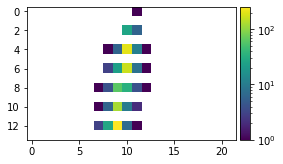

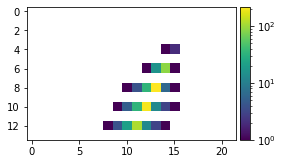

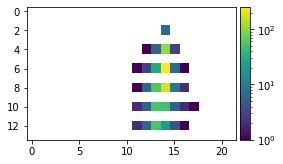

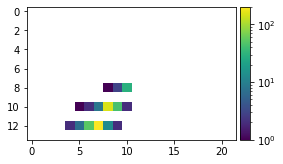

In [9]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MaxNLocator
mp.figure()
yzview = my2darr.copy()
yzview[:,1::2,:] = 0
#xzview = my2darr
#xzview[:,0::2,:] = 0
for i in range(4):
    mp.figure(figsize=(4,3))
    #im=mp.imshow(my2darr, norm=LogNorm())
    im=mp.imshow(yzview[i], norm=LogNorm())
    #im=mp.imshow(xzview[i])
    ax = mp.gca()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    mp.colorbar(im, cax=cax)
    #mp.colorbar()
    #mp.title('YZ view of BGO')
    #mp.title('XZ view of BGO')
    #mp.xlabel('Bar number')    
    #mp.ylabel('Layer number')
    mp.show()

<Figure size 432x288 with 0 Axes>

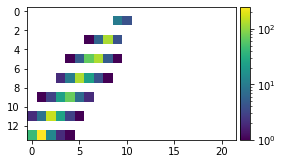

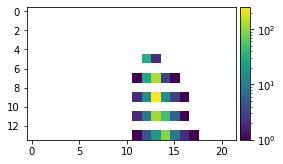

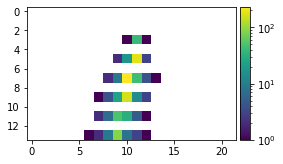

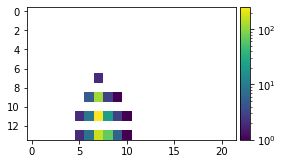

In [10]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MaxNLocator
mp.figure()
#yzview = my2darr
#yzview[:,1::2,:] = 0
xzview = my2darr.copy()
xzview[:,0::2,:] = 0
for i in range(4):
    mp.figure(figsize=(4,3))
    #im=mp.imshow(my2darr, norm=LogNorm())
    #im=mp.imshow(yzview[i])
    im=mp.imshow(xzview[i], norm=LogNorm())
    ax = mp.gca()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    mp.colorbar(im, cax=cax)
    #mp.colorbar()
    #mp.title('YZ view of BGO')
    #mp.title('XZ view of BGO')
    #mp.xlabel('Bar number')    
    #mp.ylabel('Layer number')
    mp.show()

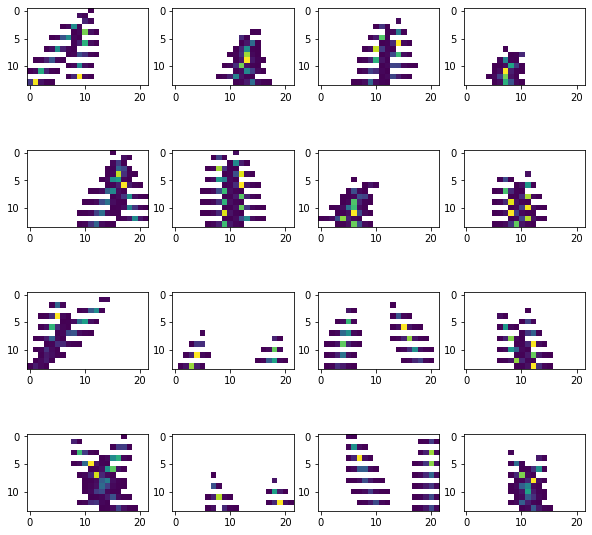

In [11]:
import matplotlib.pyplot as plt
n_c = 4
n_r = 4
fig, ax = plt.subplots(n_c, n_r, figsize=(10, 10))
for i, ax in enumerate(fig.axes):
    # Here we make a copy so we can manipulate the array without changing it in calorimeter_images
    image = calorimeter_images[i].copy()
    # Filling the zero values with NaNs will show us white space where there is zero deposits recorded.
    # Note that if we didn't have the copy there, this would insert NaNs into calorimeter_images.
    image[image == 0] = 'nan'
    ax.imshow(image)
plt.show()

These images show the energy deposits from incoming particles. The next thing we can look at is additional information from the calorimeter. The extra information is given by 
- the total energy measured in the hit (first column), and
- the energy of maximum bar in the calorimeter (second column)

In [54]:
pixel_values = np.zeros(len(calorimeter_data))
pixel_values = ( calorimeter_data[:,1] / calorimeter_data[:,0] )
print(pixel_values.astype(int))

[0 0 0 ... 0 0 0]


In [55]:
myenergy = (my2darr / 255) * calorimeter_data[0,1]


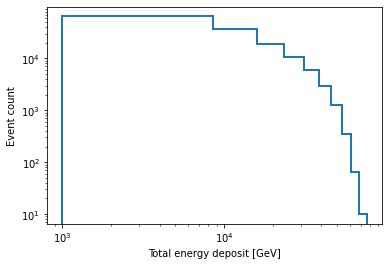

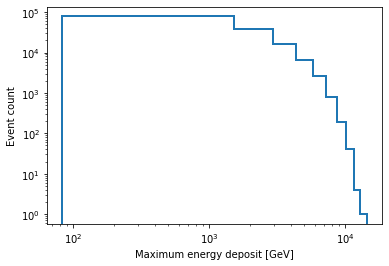

In [12]:
mp.hist(calorimeter_data[:, 0] / 1e3, histtype='step', lw=2)
mp.xscale('log')
mp.yscale('log')
mp.ylabel('Event count')
mp.xlabel('Total energy deposit [GeV]')
mp.show()

mp.hist(calorimeter_data[:, 1] / 1e3, histtype='step', lw=2)
mp.xscale('log')
mp.yscale('log')
mp.ylabel('Event count')
mp.xlabel('Maximum energy deposit [GeV]')
mp.show()

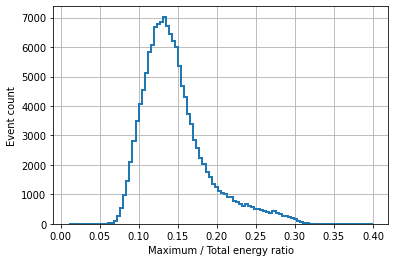

In [13]:
mp.hist(calorimeter_data[:, 1] / calorimeter_data[:, 0], 100,(0.01,0.4), histtype='step', lw=2)
#mp.xscale('log')
#mp.yscale('log')
mp.ylabel('Event count')
mp.xlabel('Maximum / Total energy ratio')
mp.grid()
mp.show()

NameError: name 'pixel_values' is not defined

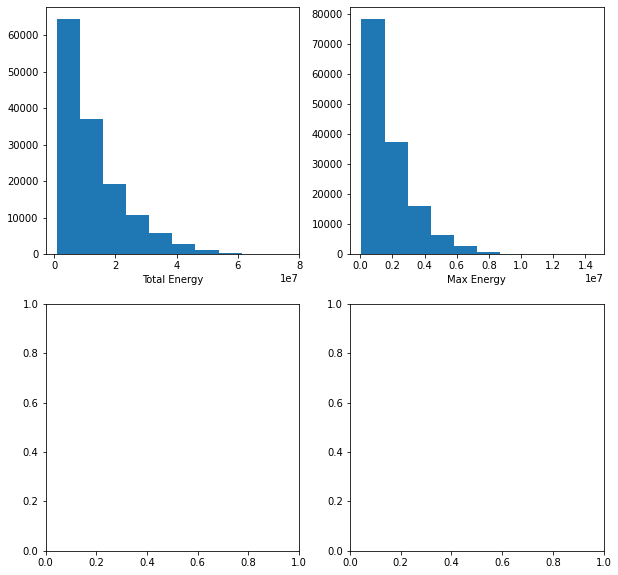

In [14]:
fig, ax = mp.subplots(2, 2, figsize=(10, 10))
ax[0,0].hist(calorimeter_data[:, 0])
ax[0,0].set_xlabel('Total Energy')
ax[0,1].hist(calorimeter_data[:, 1])
ax[0,1].set_xlabel('Max Energy')
#ax[2].hist(pixel_values.astype(int))
ax[1,0].hist(pixel_values)
ax[1,0].set_xlabel('Pixel values')
ax[1,1].hist(myenergy.flatten(),histtype='step')
ax[1,1].set_xlabel('Energy values')
mp.show()

Using these variables and the image, your goal is to predict the truth x and y coordinates of the incident particle. We can visualise this data in several different ways.

The most straightforward is to look at each example individually. Here we can see that each hit is very different from the others.

In [15]:
data_target

array([[ 1.77333786e+02,  6.03843651e+01,  5.08795586e+01,
         2.36678410e+01],
       [-3.22301788e+01,  1.95743054e-01,  2.82619995e+02,
         2.07655823e+02],
       [ 9.59162521e+01,  5.94779892e+01,  1.12897713e+02,
         1.03762871e+02],
       ...,
       [ 2.49519682e+00,  4.44591103e+01,  1.77709335e+02,
         1.51096451e+02],
       [ 2.67746948e+02,  1.43798157e+02,  1.10767815e+02,
         9.17767563e+01],
       [ 2.58738434e+02,  1.59617096e+02,  6.89115448e+01,
         6.85052490e+01]], dtype=float32)

In [16]:
data_target.max(axis=0)

array([399.96237, 318.69806, 399.99805, 319.43207], dtype=float32)

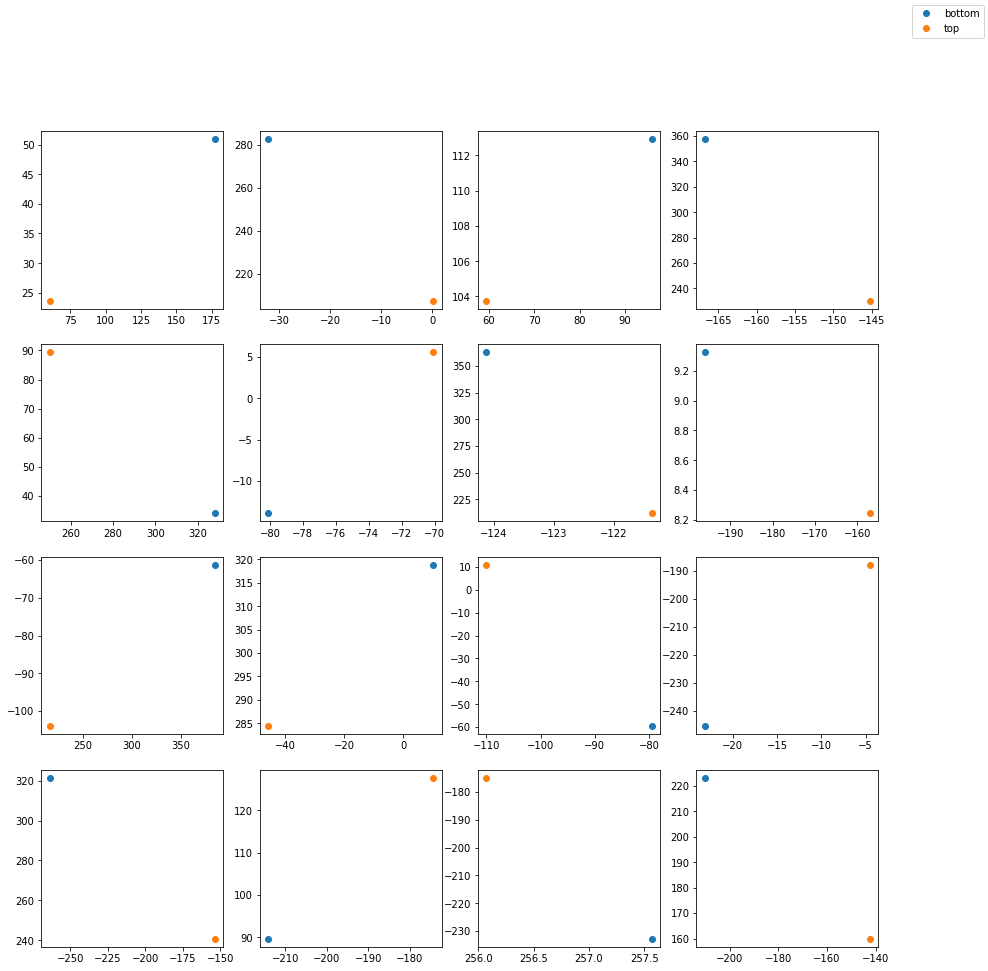

In [17]:
n_c = 4
n_r = 4
fig, axes = plt.subplots(n_c, n_r, figsize=(15, 15))
for i, ax in enumerate(fig.axes):
    x_bot, x_top, y_bot, y_top = data_target[i]
    ax.plot(x_bot, y_bot, 'o', label='bottom')
    ax.plot(x_top, y_top, 'o', label='top')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

It's also important to look at the distributions over each of these features individually.

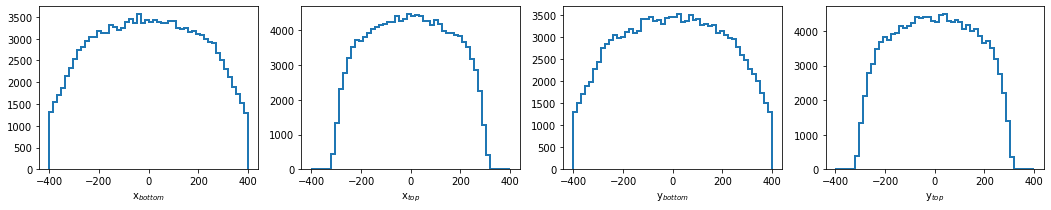

In [18]:
n_c = 1
n_r = 4
fig, axes = mp.subplots(n_c, n_r, figsize=(18, 3))
names = ['x$_{bottom}$', 'x$_{top}$', 'y$_{bottom}$', 'y$_{top}$']
for i, ax in enumerate(fig.axes):
    ax.hist(data_target[:, i], 50, (-400,400), histtype='step', lw=2)
    ax.set_xlabel(names[i])
mp.show()

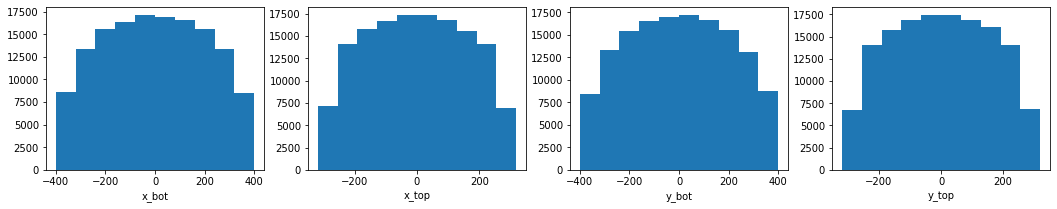

In [19]:
n_c = 1
n_r = 4
fig, axes = plt.subplots(n_c, n_r, figsize=(18, 3))
names = ['x_bot', 'x_top', 'y_bot', 'y_top']
for i, ax in enumerate(fig.axes):
    ax.hist(data_target[:, i])
    ax.set_xlabel(names[i])
plt.show()

We can also look at how the data is distributed as a whole, to see if there are any regions that are left out.

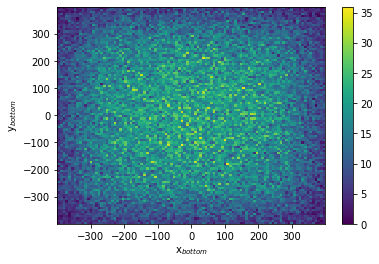

In [20]:
plt.hist2d(data_target[:, 0], data_target[:, 2], bins=100)
plt.xlabel('x$_{bottom}$')
plt.ylabel('y$_{bottom}$')
plt.colorbar()
plt.show()

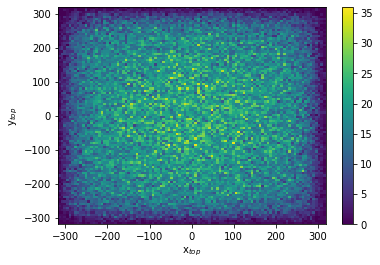

In [21]:
plt.hist2d(data_target[:, 1], data_target[:, 3], bins=100)
plt.xlabel('x$_{top}$')
plt.ylabel('y$_{top}$')
plt.colorbar()
plt.show()

The target distribution is quite tricky to visualise, and you should try to come up with your own ways of visualising it. How are the angles between hits distributed? How are the magnitudes of the vectors distributed? Will there be problems with predicting these values? Will any of these distributions lead to biases? 

These are the kinds of questions you might want to address.

In [37]:
import tensorflow as tf
from tensorflow.keras.losses import mse,mae,huber,logcosh
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [30]:
calorimeter_data.shape

(141946, 2)

In [31]:
calorimeter_images.shape

(141946, 14, 22, 1)

In [32]:
data_target.shape

(141946, 4)

In [77]:

# First we shuffle the data to ensure when we split the data different labels will be properly represented
#data = data.sample(frac=1)
#samples = data[['JetFitterSecondaryVertex_mass', 'JetFitterSecondaryVertex_energy']]
#labels = data['label'] # What do these labels mean? --> gives the target values 

# First we define the fraction of the training data we want to use for training
data_split_1 = 0.8
#data_split_2 = 0.2
n_data = calorimeter_images.shape[0]
# Now we calculate the number of samples we want to take for training
n_train = int(data_split_1 * n_data)
#n_valid = int(data_split_2 * n_data)

# Now we split our data and labels into two different sets, one for validation, one for training
training_data = calorimeter_images[:n_train]
validation_data = calorimeter_images[n_train:]
training_labels = data_target[:n_train]
validation_labels = data_target[n_train:]

In [81]:
ins = Input(shape=(14,22,1))
h1 = Conv2D(filters=50,
            kernel_size=(4,4),
            strides=(1,1),
            padding='valid',
            data_format='channels_last',
            activation='relu')(ins)
h2 = Conv2D(filters=20,
            kernel_size=(4,4),
            strides=(1,1),
            padding='valid',
            data_format='channels_last',
            activation='relu')(h1)
h3 = GlobalAveragePooling2D()(h2)
h4 = Dense(units=4,activation='relu')(h3)
outs = Dense(units=1,activation='linear')(h4)
model = Model(inputs=ins,outputs=outs)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # previously 0.01, brought AUC=0.90 to 0.91
model.compile(optimizer, loss='mse', metrics=['mse', 'mae', 'logcosh'])

history = model.fit(training_data, training_labels, epochs=20, verbose=True, 
                    validation_data=(validation_data, validation_labels))

Epoch 1/20
3549/3549 [==============================] - 31s 8ms/step - loss: 20718.7402 - mse: 20718.7402 - mae: 117.7148 - logcosh: 117.0239 - val_loss: 19893.2109 - val_mse: 19893.2109 - val_mae: 115.2217 - val_logcosh: 114.5307
Epoch 2/20
3549/3549 [==============================] - 29s 8ms/step - loss: 19741.3281 - mse: 19741.3281 - mae: 114.6842 - logcosh: 113.9932 - val_loss: 19408.4902 - val_mse: 19408.4902 - val_mae: 113.6579 - val_logcosh: 112.9669
Epoch 3/20
3549/3549 [==============================] - 30s 8ms/step - loss: 19289.7637 - mse: 19289.7637 - mae: 113.2322 - logcosh: 112.5414 - val_loss: 18907.0879 - val_mse: 18907.0879 - val_mae: 112.0548 - val_logcosh: 111.3639
Epoch 4/20
3549/3549 [==============================] - 30s 8ms/step - loss: 18843.7383 - mse: 18843.7383 - mae: 111.7649 - logcosh: 111.0738 - val_loss: 18979.6602 - val_mse: 18979.6602 - val_mae: 111.9669 - val_logcosh: 111.2761
Epoch 5/20
3549/3549 [==============================] - 31s 9ms/step - loss:

In [90]:
def plot_losses(history):
    plt.plot(history.history['loss'], label='Training loss (MSE)')
    plt.plot(history.history['mae'], label='mean_absolute_error')
    #plt.plot(history.history['mape'], label='mean_absolute_percentage_error')
    plt.plot(history.history['logcosh'], label='logcosh')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(100,125)
    plt.legend()
    plt.show()

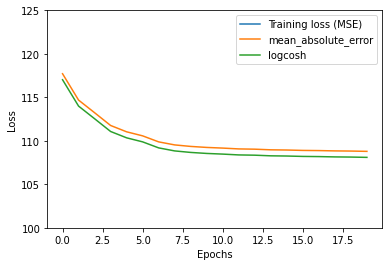

In [91]:
plot_losses(history)

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 14, 22, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 11, 19, 50)        850       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 16, 20)         16020     
                                                                 
 global_average_pooling2d (G  (None, 20)               0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 4)                 84        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                             